<a href="https://colab.research.google.com/github/Juan2341/EdgeDetection/blob/main/Edge_Detection_Program.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import PIL
import cv2
import skimage
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
opencv_img = cv2.imread('ireland-03gray.tif')
ski_img = skimage.io.imread('ireland-03gray.tif')

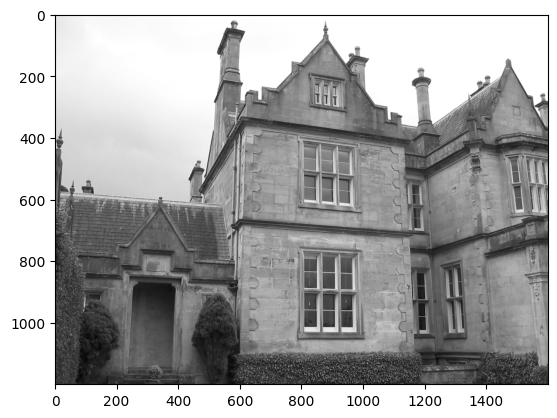

In [ ]:
plt.imshow(ski_img, cmap=plt.cm.gray)

In [ ]:
Sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])
Sobel_y = np.array([[-1, -2, -1],
                    [0, 0, 0],
                    [1, 2, 1]])

In [ ]:
def edge_detection(img_sample):
  n,m = img_sample.shape
  scale = 1.5
  img_sample_edge = np.zeros_like(img_sample)
  for row in range(1, n-2):
    for col in range(1, m-2):
      origin_window = img_sample[row-1:row+2, col-1:col+2]
      filter_x = np.mean(Sobel_x * origin_window)
      filter_y = np.mean(Sobel_y * origin_window)
      img_sample_edge[row, col] = np.sqrt(filter_x**2 + filter_y**2)

  img_highlights = img_sample + scale * img_sample_edge
  img_highlights = np.clip(img_sample_edge, 0, 255).astype(np.uint8)

  plt.imshow(img_highlights, cmap=plt.cm.gray)
  return img_highlights

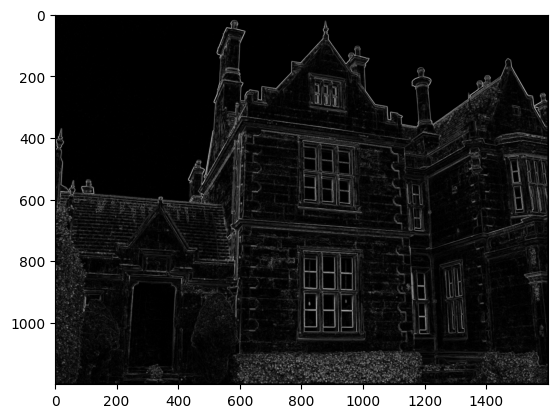

In [ ]:
img_edge = edge_detection(ski_img)

In [ ]:
opencv_img_color = cv2.imread('Amsterdam.JPG')
ski_img_color = skimage.io.imread('Amsterdam.JPG')


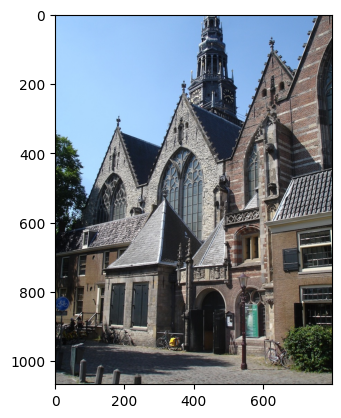

In [ ]:
plt.imshow(ski_img_color, cmap=plt.cm.gray)

In [ ]:
def edge_detection_color(img_sample):

  #Convert the image to grayscale
  gray_img = np.average(img_sample, axis=-1)

  #Find the gradient operation of each color channel
  n,m = gray_img.shape
  scale = 1.5
  img_sample_edge = np.zeros_like(gray_img)
  for row in range(1, n-2):
    for col in range(1, m-2):
      origin_window = gray_img[row-1:row+2, col-1:col+2]
      filter_x = np.mean(Sobel_x * origin_window)
      filter_y = np.mean(Sobel_y * origin_window)
      img_sample_edge[row, col] = np.sqrt(filter_x**2 + filter_y**2)

  #Add the gradient operation to each of the color channels
  newR = np.clip(img_sample[:, :, 0] + (scale * img_sample_edge).astype(np.uint8), 0, 255)
  newB = np.clip(img_sample[:, :, 1] + (scale * img_sample_edge).astype(np.uint8), 0, 255)
  newG = np.clip(img_sample[:, :, 2] + (scale * img_sample_edge).astype(np.uint8), 0, 255)

  img_highlights_color = np.stack([newR,newB,newG], 2)
  plt.imshow(img_highlights_color, cmap=plt.cm.gray)
  return img_highlights_color

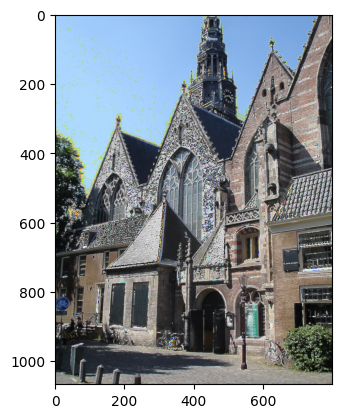

In [ ]:
img_edge_color = edge_detection_color(ski_img_color)

In [ ]:
def edge_detection_neg(img_sample):
  #Convert the image to grayscale
  gray_img = np.average(img_sample, axis=-1)

  #Find the gradient operation of each color channel
  n,m = gray_img.shape
  scale = 1.5
  img_sample_edge = np.zeros_like(gray_img)
  for row in range(1, n-2):
    for col in range(1, m-2):
      origin_window = gray_img[row-1:row+2, col-1:col+2]
      filter_x = np.mean(Sobel_x * origin_window)
      filter_y = np.mean(Sobel_y * origin_window)
      img_sample_edge[row, col] = np.sqrt(filter_x**2 + filter_y**2)

  #Subtract the gradient operation from each of the color channels
  newR = np.clip(img_sample[:, :, 0] - (scale * img_sample_edge).astype(np.uint8), 0, 255)
  newB = np.clip(img_sample[:, :, 1] - (scale * img_sample_edge).astype(np.uint8), 0, 255)
  newG = np.clip(img_sample[:, :, 2] - (scale * img_sample_edge).astype(np.uint8), 0, 255)

  img_highlights_neg = np.stack([newR,newB,newG], 2)
  plt.imshow(img_highlights_neg, cmap=plt.cm.gray)
  return img_highlights_neg

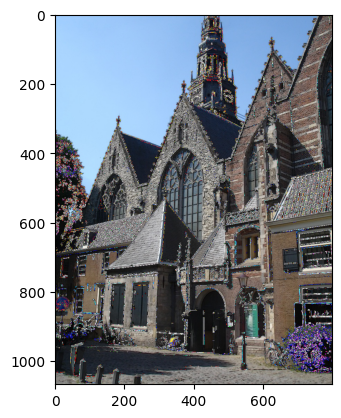

In [ ]:
img_edge_neg = edge_detection_neg(ski_img_color)